<a href="https://colab.research.google.com/github/mharrisonbaker/DATA620/blob/main/DATA620_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source Library

SNAP: A General-Purpose Network Analysis and Graph-Mining Library, Jure Leskovec and Andrej Krevl; June 2014; http://snap.stanford.edu/data

Datset

Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv, and thus represents essentially the complete history of its GR-QC section.

https://snap.stanford.edu/data/ca-GrQc.html

In [34]:
!pip install pyvis

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import numpy as np
from IPython.display import SVG, display
from pyvis import network as net

%matplotlib inline

In [3]:
#comment out if not using colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#uncomment this if you are reading from disk
# fh = open("ca-GrQc.txt","rb")
# G = nx.read_weighted_edgelist(fh, create_using=nx.DiGraph(), nodetype=int)
# fh.close()

In [17]:
#comment this out later if you are reading file from disk, i changed read as undirected Graph
G = nx.read_edgelist("/content/drive/MyDrive/ca-GrQc.txt",create_using=nx.Graph(), nodetype = int)

In [18]:
#make sure G is read correctly
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 5242\nNumber of edges: 14496\nAverage degree:   5.5307'

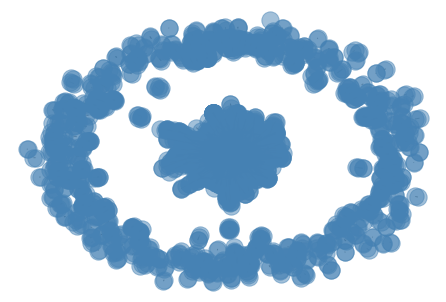

In [32]:
nx.draw_spring(G,with_labels = False, node_color="steelblue", alpha=0.5)

Analysis Part:

In [19]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 5242
Number of edges: 14496
Average degree:   5.5307


In [20]:
deg = nx.degree(G)
deg = dict(list(deg))

In [21]:
min(deg.values())

1

In [22]:
max(deg.values())

81

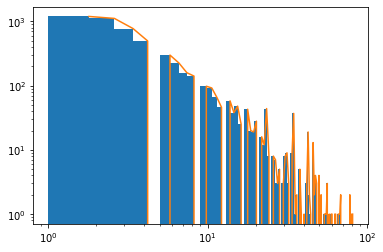

In [23]:
h = plt.hist(deg.values(), 100)
plt.loglog(h[1][1:], h[0])

In [30]:
#as shown in the first visualization, our graph is disconnected, instead we find the diameter of the largest subgraph in the set
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])


In [31]:
nx.diameter(G0)

17

In [38]:
nt = Network('500px', '500px')
nt.from_nx(G)
net.enable_physics(True)
nt.show('nx.html')

In [42]:
gn=net.Network(notebook=True)
nxg = G0
gn.from_nx(nxg)
gn.show("gn.html")